## Problema del viajante

Resolver el problema del viajante utilizando algoritmos genéticos. 

- ¿Es posible aproximarse al resultado?

## Codificación

- Definir como se codificará el problema

- San Rafael X1
- El Nihuil X2
- El sosneado X3
- Villa Atuel X4
- Jaime Prats X5
- Las Malvinas X6
- Salto de las Rosas X7
- Rama caída X8
- Monte Coman X9
- Gral. Alvear X10
- Rincón del Atuel X11

Ciudades = 11
N = 10

In [1]:
import numpy as np
import random
import copy
import sys
from functools import reduce
import matplotlib
import matplotlib.pyplot as plt

## Adaptación

- Definir como se calculará la adaptación de un individuo
- ¿Existen estados que deben ser penalizados?


In [2]:
kms = [
    [0, 72.7, 137, 59.1, 70.1, 36.6, 18.9, 8.7, 50.7, 84.8, 37.6],
    [72.7, 0, 107.8, 108, 120, 135, 97.4, 84, 69.7, 122, 35],
    [137, 108, 0, 184, 200, 162, 148, 134, 186, 214, 99.1],
    [54.3, 120, 184, 0, 16.7, 45.2, 35.6, 54.5, 47.1, 31.4, 84.7], 
    [70.1, 136, 200, 16.9, 0, 60.8, 51.3, 70.2, 41.2, 15, 64.6], 
    [36, 97.7, 162, 45.6, 60.8, 0, 18.8, 29.7, 57.8, 75.4, 62.6], 
    [18.7, 84.2, 148, 36, 51.2, 18.8, 0, 18.9, 43, 65.8, 49.1], 
    [8.7, 69.8, 134, 54.9, 73.5, 29.6, 18.8, 0, 56.4, 84.7, 34.7], 
    [50.5, 122, 186, 47.2, 41.3, 52.8, 43, 56.3, 0, 48, 86.5], 
    [84.8, 122, 214, 31.4, 15, 75.4, 65.8, 84.7, 48, 0, 115], 
    [37.6, 35.2, 99.1, 85.1, 100, 62.5, 49.1, 34.7, 86.6, 115, 0]
]

cities = [
    "San Rafael",
    "El Nihuil",
    "El sosneado",
    "Villa Atuel",
    "Jaime Prats",
    "Las Malvinas",
    "Salto de las Rosas",
    "Rama caída",
    "Monte Coman",
    "General Alvear",
    "Rincón del Atuel"
]


def get_loc(ruta):
    localities = []
    for indice_loc in ruta:
        localities.append(cities[indice_loc])
    return localities

In [3]:
def get_distance(route):  
    first = route[0]
    cost = 0
    for actual in route:
        cost += kms[first][actual]
        first = actual
    return cost
        
def get_adaptation(population):
    adaptation = []
    for route in population:
        adaptation.append(get_distance(route))
    return adaptation

## Selección

In [4]:
def get_prob_adaptation(adaptations):
    summation = sum(adaptations)
    prob = []
    for adaptation in adaptations:
        prob.append(adaptation / summation)
    return prob

def select_parents(population, adaptation, len_parents):
    prob = get_prob_adaptation(adaptation)
    indexes = np.random.choice(range(len(population)), size=len_parents, replace=False, p=prob)
    return np.array([population[i] for i in indexes])

## Cruza uniforme

In [5]:
def crosses(parents, tam):
    children = np.empty((tam, parents.shape[1]))
    cross_point = np.uint8(parents.shape[0] / 2)
    for k in range(tam):
        idx_p1 = k % parents.shape[0]
        idx_p2 = (k + 1) % parents.shape[0]
        children[k, 0:cross_point] = parents[idx_p1, 0:cross_point]
        children[k, cross_point:] = parents[idx_p2, cross_point:]
    return children

## Mutación

In [6]:
def mutation(children):
    for indice in range(children.shape[0]):
        while True:
            posicion1 = random.randint(0, len(children[indice, :]) - 1 )
            posicion2 = random.randint(0, len(children[indice, :]) - 1 )
            if posicion1 != posicion2:
                break
        children[indice, posicion1], children[indice, posicion2] = children[indice, posicion2], children[indice, posicion1]
        
    return children

# Algoritmo

Population:  [[ 6  2  7 ...  5  3  4]
 [ 6  8  1 ...  2 10  3]
 [ 6  7 10 ...  5  4  8]
 ...
 [ 4  2  7 ...  9  6  3]
 [ 8  4  2 ... 10  7  5]
 [ 3  7  5 ...  4  9  1]]
Best:  [ 7  3  2  9 10  8  6  4  1  5]
['Rama caída', 'Villa Atuel', 'El sosneado', 'General Alvear', 'Rincón del Atuel', 'Monte Coman', 'Salto de las Rosas', 'Jaime Prats', 'El Nihuil', 'Las Malvinas']
Distance:  1019.7


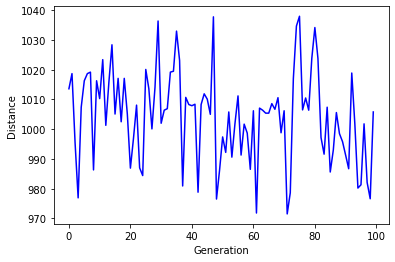

In [7]:
population = []
genes = 10
guys = 10000
generations = 100
len_parents = 50
example = list(range(1, genes + 1))

for i in range(guys):
    new = copy.copy(example)
    random.shuffle(new)
    population.append(new)
eje_gen = []
eje_adap = []
population = np.array(population)
print("Population: ", population)
for generacion in range(generations):
    adaptation = get_adaptation(population)
    parents = select_parents(population, adaptation, len_parents)
    tam = len(population) - parents.shape[0]
    children = crosses(parents, tam)    
    hijos_mutados = mutation(children)
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = hijos_mutados
    eje_adap.append(max(adaptation))
    eje_gen.append(generacion)
    
adaptation = get_adaptation(population)
best_adap_index = np.where(adaptation == np.max(adaptation))
best_route = population[best_adap_index[0][0],:]
localities = get_loc(best_route)
print("Best: ", population[best_adap_index[0][0],:])
print(localities)
print("Distance: ", adaptation[best_adap_index[0][0]])
fig, ax = plt.subplots()
ax.plot(eje_gen, eje_adap, 'b')
ax.set_ylabel('Distance')
ax.set_xlabel('Generation')
plt.show()